# Project: TMDb Movies Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This dataset contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.
> We going to analyze it and trying to asking some questions and answer them to investigate the dataset and figure out what is the knowledge we can obtain from this dataset.

>#### The question I'm trying to answer through this analysis are :
>- Q1 : Who is best director based on vote?
>- Q2 : Who is best director based on poprularity?
>- Q3 : Who is best director based on profit?
>- Q4 : Which is best movie based on vote?
>- Q5 : Which is best movie based on poprularity?
>- Q6 : Which is best movie based on profit?
>- Q7 : Is the profits get change over time ?
>- Q8 : Is the budget get change over time ?

In [1]:
# import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
# load dataset
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
# check dataset dimensions
df.shape

(10866, 21)

In [4]:
# check datatype of each column
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [5]:
# displays a concise summary of the dataframe,
# including the number of non-null values in each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [6]:
# check descriptive statistics for the data
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


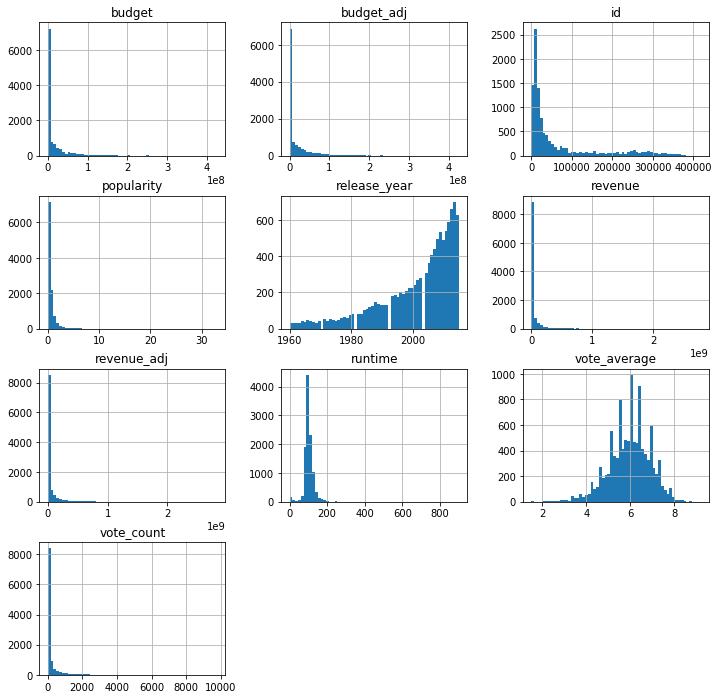

In [7]:
# show overall distribution of data from each column
df.hist(figsize = (12,12), bins=60);

In [8]:
# check number of null values for each column
col = df.columns
df[col].isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [9]:
# check number of zeros for each column
print((df[col] == 0).sum())

id                         0
imdb_id                    0
popularity                 0
budget                  5696
revenue                 6016
original_title             0
cast                       0
homepage                   0
director                   0
tagline                    0
keywords                   0
overview                   0
runtime                   31
genres                     0
production_companies       0
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj              5696
revenue_adj             6016
dtype: int64


### Data Cleaning

In [10]:
# drop the colmuns that we will not need to answer our questions
df.drop(['id', 'imdb_id', 'homepage', 'tagline', 'keywords', 'overview', 'budget_adj', 'revenue_adj'], axis=1, inplace=True)

In [11]:
# drop duplicate values from the dataset
df.drop_duplicates(inplace=True)

In [12]:
# drop na values from the dataset
df.dropna(inplace=True)

In [13]:
# confirm the cleaning process
df.head(1)

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015


In [14]:
df.shape

(9772, 13)

In [15]:
print((df.revenue == 0).value_counts())
print((df.budget == 0).value_counts())

True     5022
False    4750
Name: revenue, dtype: int64
False    5021
True     4751
Name: budget, dtype: int64


In [16]:
# Define functions to drop zero values from specific columns
def drop_zeros(*col_names):
    drop_zeros = pd.DataFrame(data=df)
    drop_zeros = drop_zeros.replace(0, np.nan)
    for name in col_names:
        drop_zeros = drop_zeros.dropna(subset=[name])
    return drop_zeros

In [17]:
# Use drop_zeros function to drop zero values from budget and revenue columns
df_profit = drop_zeros('budget','revenue')

In [18]:
df_profit.shape

(3805, 13)

In [19]:
# confirm drop process
print((df_profit.revenue == 0).value_counts())
print((df_profit.budget == 0).value_counts())

False    3805
Name: revenue, dtype: int64
False    3805
Name: budget, dtype: int64


In [20]:
# Check number of rows after drop zero values
df_profit.shape

(3805, 13)

In [21]:
# Calculate the profit for each movie
profit = df_profit['revenue'] -  df_profit['budget']
# Add the profit column to the main dataset
df_profit['profit'] = profit
# Confirm add process
df_profit.head(2)

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,profit
0,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.363529e+09
1,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,2.284364e+08


<a id='eda'></a>
## Exploratory Data Analysis

In [22]:
# Define function for extract, split and store data from specific columns
def extract_data(column_name):
    df['cast']=df['cast']
    df['director']=df['director']
    
    # From the column entered, Separate the string by '|'
    all_data = df[column_name].str.cat(sep = '|')
    
    # Store the values separately as series
    all_data = pd.Series(all_data.split('|'))
    
    # Read the descending order, starts with highest number
    count = all_data.value_counts(ascending = False)
    
    return count

In [23]:
# Use extract_data function for the casts.
cast_count = extract_data('cast')
cast_count = pd.DataFrame(data=cast_count)
# take top 10 highest values
top_cast = cast_count.head(10)

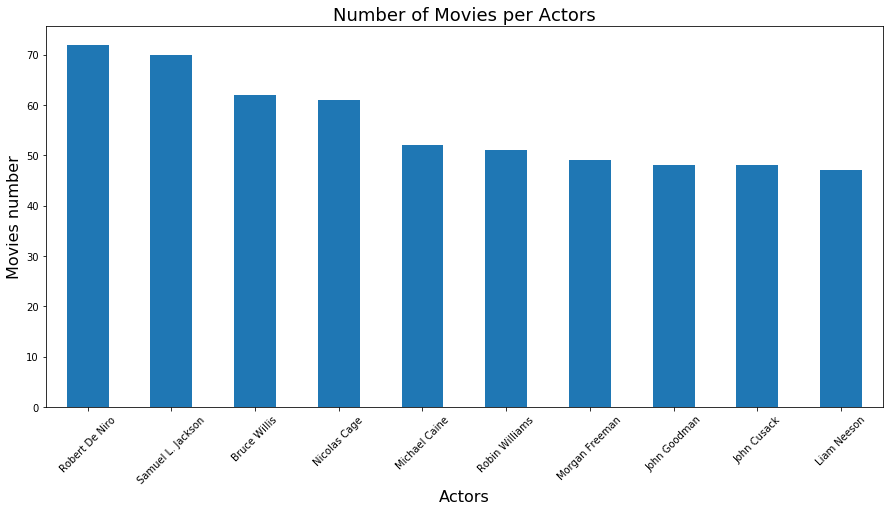

In [24]:
# plot the top 10 actors per number of movies
top_cast.plot.bar(legend=False, figsize =(15, 7))
# rotate x axis ticks
plt.xticks(rotation=45)
# Figure title 
plt.title('Number of Movies per Actors',fontsize= 18)
# x axis label
plt.xlabel("Actors", fontsize= 16)
# y axis label
plt.ylabel("Movies number", fontsize= 16);

>#### We see here that Robert De Niro & Samuel L. Jackson is
>#### The most actors that act in movies from 1960 to 2015
>#### Woody Allen had act in 72 movies
>#### And Clint Eastwood had act in 70 movies

In [25]:
# Use extract_data function for the directors, plot.
director_count = extract_data('director')
director_count = pd.DataFrame(data=director_count)
# take top 10 highest values
top_director = director_count.head(10)

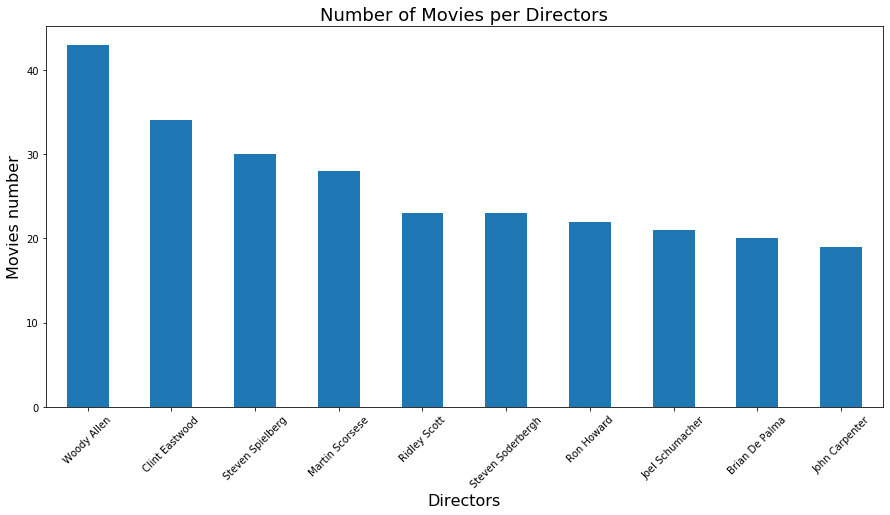

In [26]:
# plot the top 10 directors per number of movies
top_director.plot.bar(legend=False, figsize =(15, 7))
# rotate x axis ticks
plt.xticks(rotation=45)
# Figure title 
plt.title('Number of Movies per Directors',fontsize= 18)
# x axis label
plt.xlabel("Directors", fontsize= 16)
# y axis label
plt.ylabel("Movies number", fontsize= 16);

>#### We see here that Woody Allen & Clint Eastwood is
>#### The most directors that produce movies from 1960 to 2015
>#### Woody Allen had direct more than 40 movies
>#### And Clint Eastwood had direct more than 30 movies

In [28]:
# Use extract_data function for the genres, plot.
genres_count = extract_data('genres')
genres_count = pd.DataFrame(data=genres_count)
# take all 20 genres values
top_genres = genres_count.head(20)

#### Plot number of movies per genres

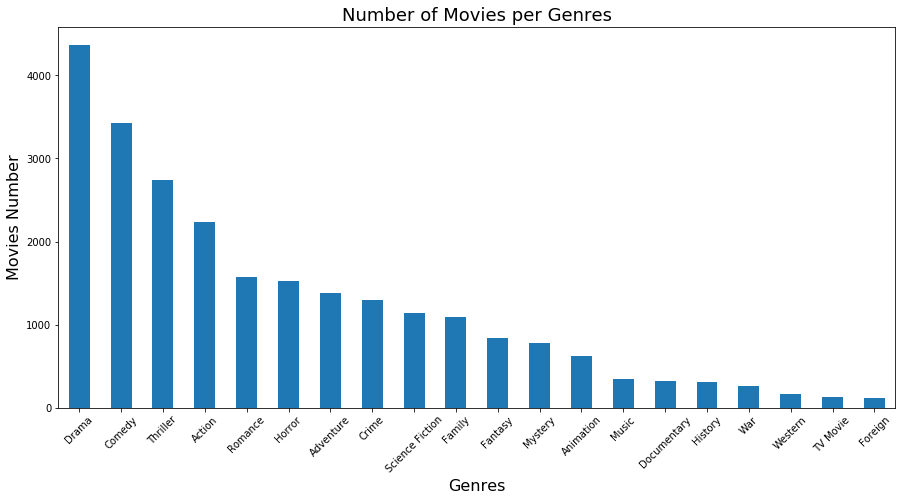

In [29]:
# plot all movies genre
top_genres.plot.bar(legend=False, figsize =(15, 7))
# rotate x axis ticks
plt.xticks(rotation=45)
# Figure title 
plt.title('Number of Movies per Genres',fontsize= 18)
# x axis label
plt.xlabel("Genres", fontsize= 16)
# y axis label
plt.ylabel("Movies Number", fontsize= 16);

>#### It's look the genres of drama & comedy is the most movies produced from 1960 to 2015

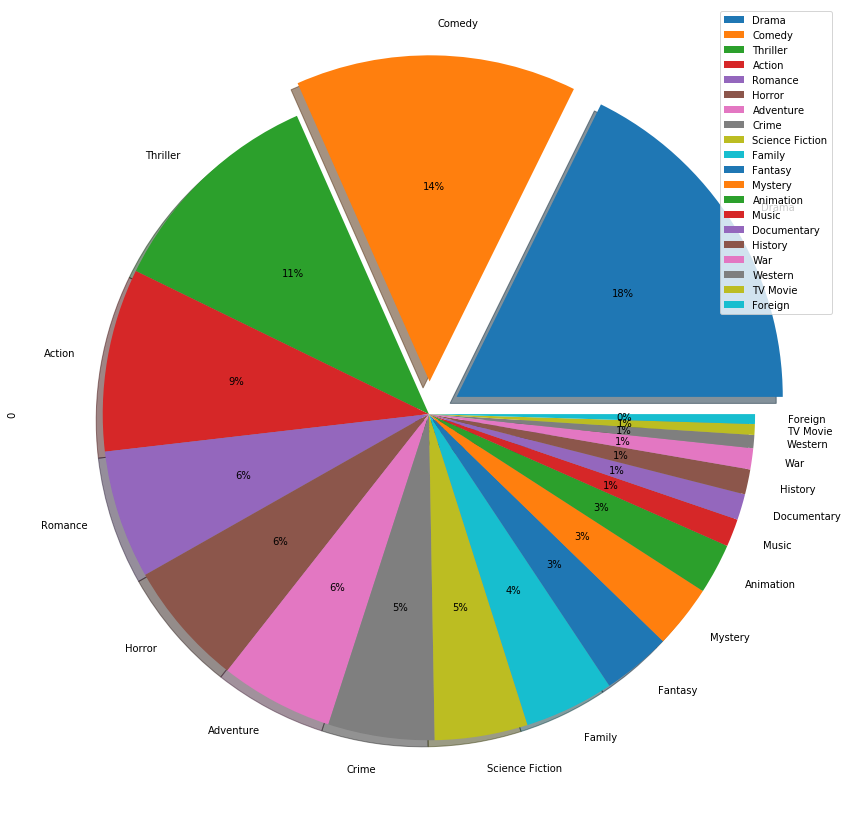

In [30]:
# explode values for each genre, make only the two top genres explode
explode = (0.1,0.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0)
# Plot pie chart for all movies genres with percentage values
top_genres.plot.pie(subplots=True,figsize=(15,15)
                      ,autopct='%1.0f%%', explode=explode,shadow=True);

>#### It's look the genres of drama & comedy is the most movies produced from 1960 to 2015
>#### Drama genre has 18% of all movies
>#### Comedy genre has 14% of all movies

### Q1 : Who is best director based on vote?

In [31]:
# make a copy from the main dataset
df_dir = df.copy()
# select the main director for each movie
df_dir['director'] = df_dir['director'].apply(lambda x: x.split("|",6)[0])
# Create a specific dataframe
df_dir1 = df_dir[['director', 'vote_count','vote_average']]
# sort the dataframe descending
df_dir1 = df_dir1.sort_values(['vote_count','vote_average'], ascending=False)
df_dir1.head()

,director,vote_count,vote_average
1919,Christopher Nolan,9767,7.9
4361,Joss Whedon,8903,7.3
1386,James Cameron,8458,7.1
2875,Christopher Nolan,8432,8.1
4364,Quentin Tarantino,7375,7.7


#### plot the top 10 movies that get the highest vote

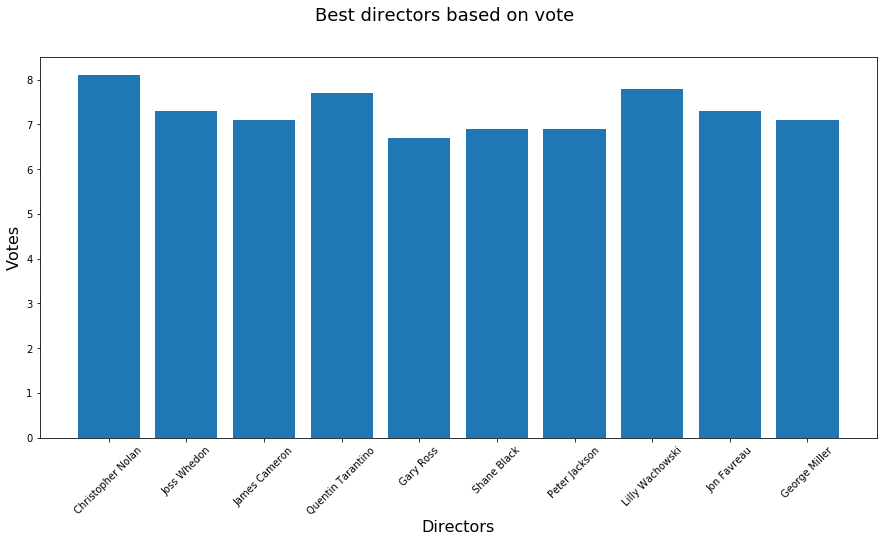

In [32]:
# create x axis & y axis data
director = df_dir1['director'].head(13) 
vote = df_dir1['vote_average'].head(13) 
# Figure Size 
fig = plt.figure(figsize =(15, 7))
# Figure title 
fig.suptitle('Best directors based on vote', fontsize = 18)
# x axis label
plt.xlabel('Directors', fontsize = 16)
# y axis label
plt.ylabel('Votes', fontsize = 16)
# rotate x axis ticks
plt.xticks(rotation=45)
# plot the top 10 movies that get the highest vote
plt.bar(director[0:13], vote[0:13]);

>#### Christopher Nolan & Quentin Tarantino get the best directors based on vote

### Q2 : Who is best director based on popularity?

In [33]:
# Create a specific dataframe
df_dir2 = df_dir[['director', 'popularity']]
# sort dataframe descending
df_dir2 = df_dir2.sort_values('popularity', ascending=False)
df_dir2.head()

,director,popularity
0,Colin Trevorrow,32.985763
1,George Miller,28.419936
629,Christopher Nolan,24.949134
630,James Gunn,14.311205
2,Robert Schwentke,13.112507


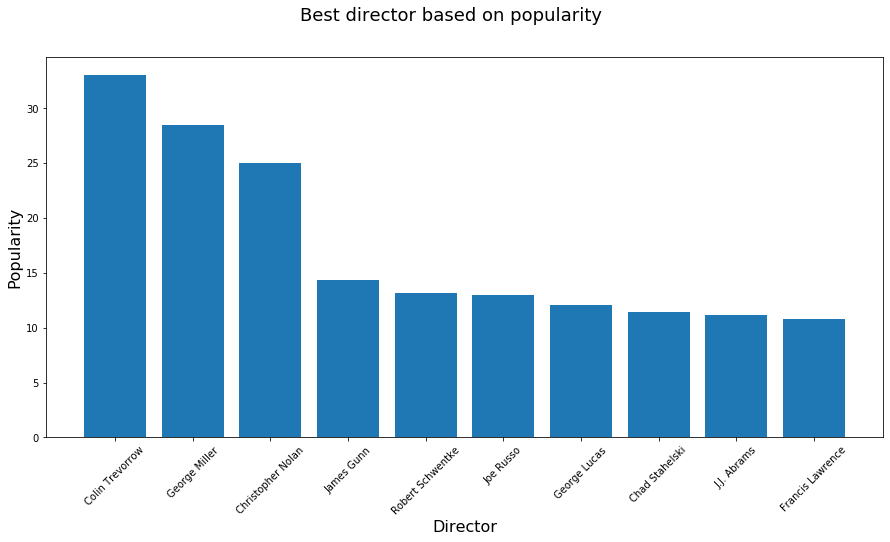

In [34]:
# create x axis & y axis data
director = df_dir2['director'].head(10) 
pop = df_dir2['popularity'].head(10) 
# Figure Size 
fig = plt.figure(figsize =(15, 7))
# Figure title
fig.suptitle('Best director based on popularity', fontsize = 18)
# x axis label
plt.xlabel('Director', fontsize = 16)
# y axis label
plt.ylabel('Popularity', fontsize = 16)
# rotate x axis ticks
plt.xticks(rotation=45)
# plot the top 10 movies that get the highest popularity
plt.bar(director[0:10], pop[0:10]);

>#### Colin Trevorrow & George Miller & Christopher Nolan are the most popularity directors

### Q3 : Who is best director based on profit?

In [35]:
# Create a specific dataframe
df_dir3 = df_profit[['director', 'profit']]
# sort dataframe descending
df_dir3 = df_dir3.sort_values('profit', ascending=False)
df_dir3.head()

,director,profit
1386,James Cameron,2.544506e+09
3,J.J. Abrams,1.868178e+09
5231,James Cameron,1.645034e+09
0,Colin Trevorrow,1.363529e+09
4,James Wan,1.316249e+09


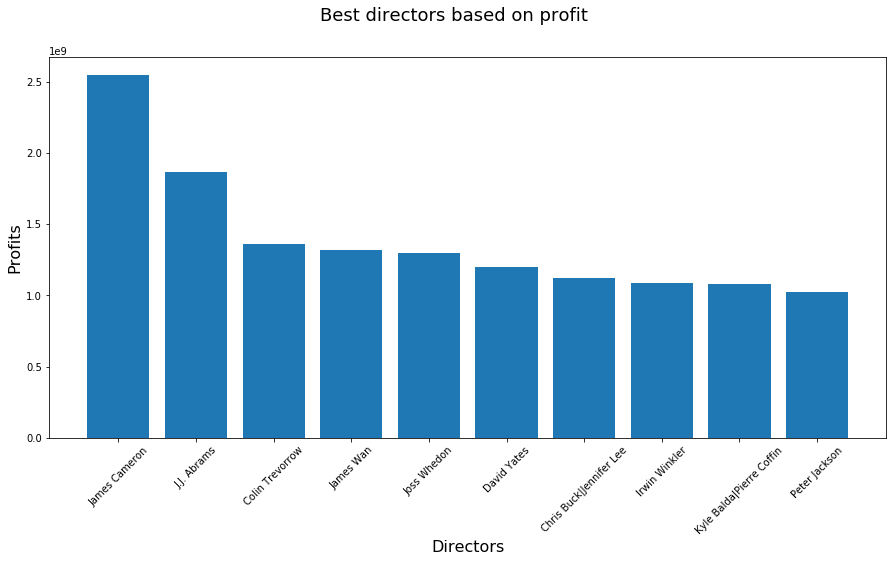

In [36]:
# create x axis & y axis data
director = df_dir3['director'].head(12) 
profit = df_dir3['profit'].head(12) 
# Figure Size 
fig = plt.figure(figsize =(15, 7))
# Figure title 
fig.suptitle('Best directors based on profit', fontsize = 18)
# x axis label
plt.xlabel('Directors', fontsize = 16)
# y axis label
plt.ylabel('Profits', fontsize = 16)
# rotate x axis ticks
plt.xticks(rotation=45)
# plot the top 10 movies that get the highest profit
plt.bar(director[0:12], profit[0:12]);

>#### James Cameron is a very successful man where speak about profits

### Q4 : Which is best movies based on vote?

In [37]:
# make a copy from the main dataset
df_mov = df.copy()
# Create a specific dataframe
df_mov1 = df_mov[['original_title', 'vote_count','vote_average']]
# sort dataframe descending
df_mov1 = df_mov1.sort_values(['vote_count','vote_average'], ascending=False)
df_mov1.head()

,original_title,vote_count,vote_average
1919,Inception,9767,7.9
4361,The Avengers,8903,7.3
1386,Avatar,8458,7.1
2875,The Dark Knight,8432,8.1
4364,Django Unchained,7375,7.7


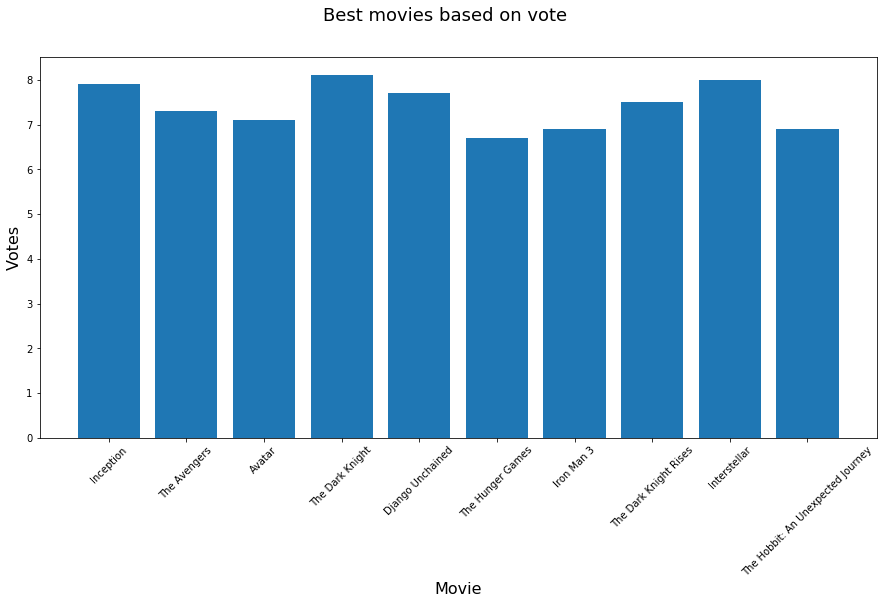

In [38]:
# create x axis & y axis data
movie = df_mov1['original_title'].head(10) 
vote = df_mov1['vote_average'].head(10) 
# Figure Size 
fig = plt.figure(figsize =(15, 7))
# Figure title 
fig.suptitle('Best movies based on vote', fontsize = 18)
# x axis label
plt.xlabel('Movie', fontsize = 16)
# y axis label
plt.ylabel('Votes', fontsize = 16)
# rotate x axis ticks
plt.xticks(rotation=45)
# plot the top 10 movies that get the highest vote
plt.bar(movie[0:10], vote[0:10]);

>#### We use the highest vote average with the highest vote count together to determine the best movies based on vote, because there're some movie with little vote count and high vote average, so the top three movies based on are Inception & The Avengers & Avatar

### Q5 : Which is best movies based on popularity?

In [39]:
# Create a specific dataframe
df_mov2 = df_mov[['original_title', 'popularity']]
# sort dataframe descending
df_mov2 = df_mov2.sort_values(['popularity'], ascending=False)
df_mov2.head()

,original_title,popularity
0,Jurassic World,32.985763
1,Mad Max: Fury Road,28.419936
629,Interstellar,24.949134
630,Guardians of the Galaxy,14.311205
2,Insurgent,13.112507


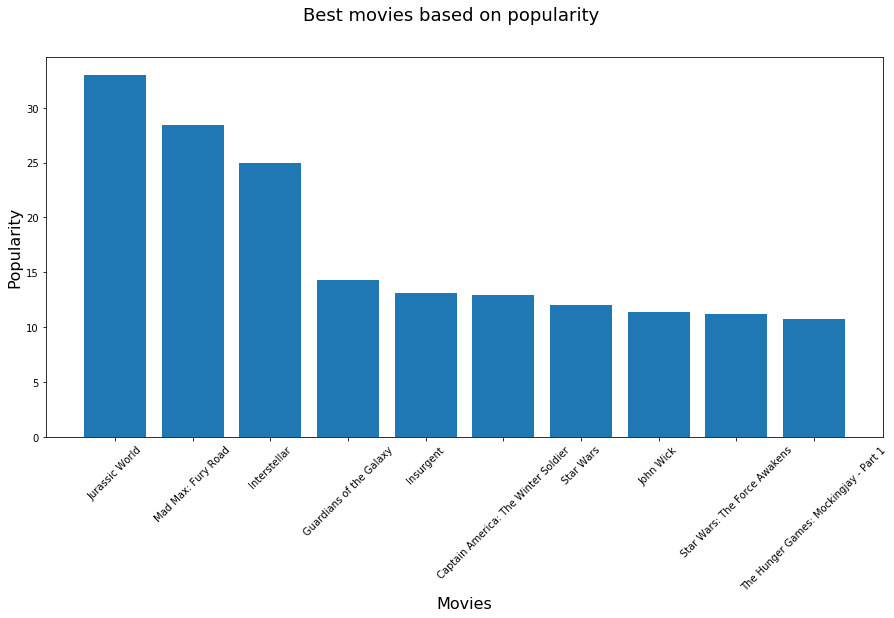

In [40]:
# create x axis & y axis data
movie = df_mov2['original_title'].head(10) 
pop = df_mov2['popularity'].head(10) 
# Figure Size 
fig = plt.figure(figsize =(15, 7))
# Figure title 
fig.suptitle('Best movies based on popularity', fontsize = 18)
# x axis label
plt.xlabel('Movies', fontsize = 16)
# y axis label
plt.ylabel('Popularity', fontsize = 16)
# rotate x axis ticks
plt.xticks(rotation=45)
# plot the top 10 movies that get the highest popularity
plt.bar(movie[0:10], pop[0:10]);

>#### Jurassic World & Mad Max: Fury Road & Interstellar are in a different level in popularity.

### Q6 : Which is best movies based on profit?

In [41]:
# Create a specific dataframe
df_mov3 = df_profit[['original_title', 'profit']]
# sort dataframe descending
df_mov3 = df_mov3.sort_values(['profit'], ascending=False)
df_mov3.head()

,original_title,profit
1386,Avatar,2.544506e+09
3,Star Wars: The Force Awakens,1.868178e+09
5231,Titanic,1.645034e+09
0,Jurassic World,1.363529e+09
4,Furious 7,1.316249e+09


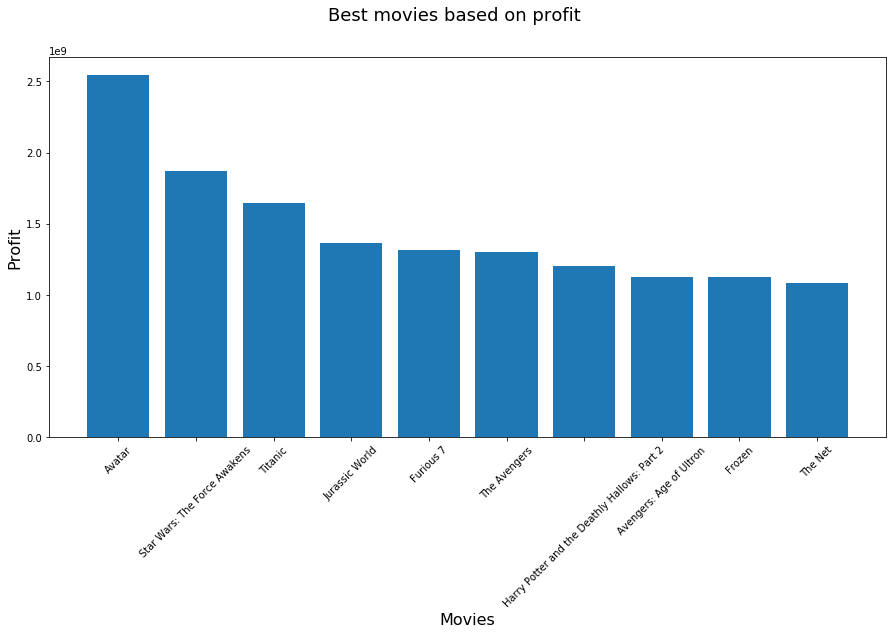

In [42]:
# create x axis & y axis data
movie = df_mov3['original_title'].head(10) 
profit = df_mov3['profit'].head(10) 
# Figure Size 
fig = plt.figure(figsize =(15, 7))
# Figure title 
fig.suptitle('Best movies based on profit', fontsize= 18) 
# x axis label
plt.xlabel('Movies', fontsize= 16)
# y axis label
plt.ylabel('Profit', fontsize= 16)
# rotate x axis ticks
plt.xticks(rotation=45)
# plot the top 10 movies that get the highest profit
plt.bar(movie[0:10], profit[0:10]);

>#### In this plot it seem Avatar movie is the latest boom in the world of movies, it make a very high profit never happen before.

### Q7 : Is the profits get change over time ?

In [43]:
# get the sum of profit for each year
profit_year = df_profit.groupby('release_year')['profit'].sum()
profit_year.head(5)

release_year
1960    108198052.0
1961    299083188.0
1962    166879846.0
1963    115411882.0
1964    294678387.0
Name: profit, dtype: float64

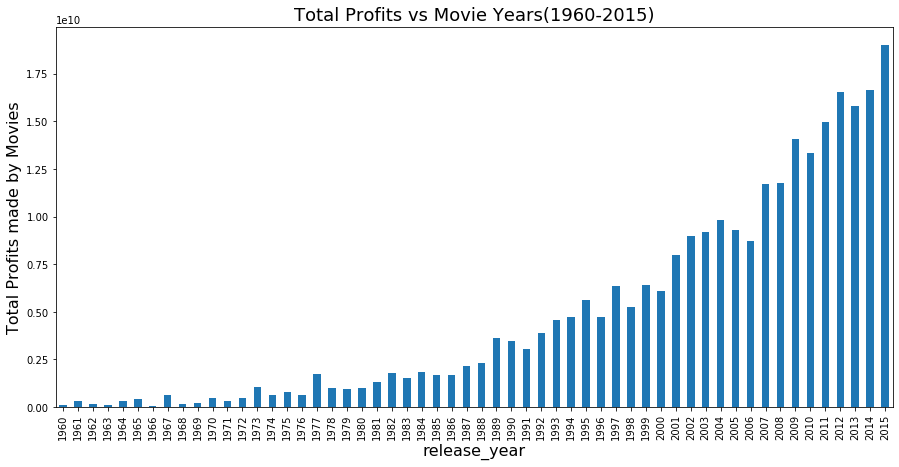

In [44]:
# x axis label
plt.xlabel('Movies released year', fontsize = 16)
# y axis label
plt.ylabel('Total Profits made by Movies', fontsize = 16)
# Figure title 
plt.title('Total Profits vs Movie Years(1960-2015)', fontsize = 18)
# plot the sum of profit for each year
profit_year.plot.bar(figsize = (15,7));

>#### This plot make the answer clear, the profits of moives are increase over time

### Q8 : Is the budget get change over time ?

In [45]:
# Use drop_zero function to drop zero values from budget column
df_budget = drop_zeros('budget')

In [46]:
# get the sum of budget for each year
budget_year = df_budget.groupby('release_year')['budget'].sum()
budget_year.head(5)

release_year
1960    22056948.0
1961    46137000.0
1962    54722126.0
1963    73331500.0
1964    39483161.0
Name: budget, dtype: float64

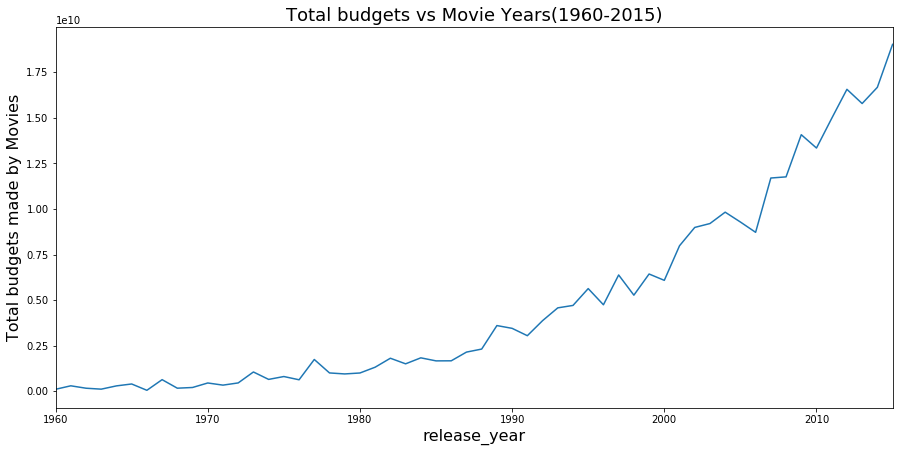

In [47]:
# x axis label
plt.xlabel('Movies released year', fontsize = 16)
# y axis label
plt.ylabel('Total budgets made by Movies', fontsize = 16)
# Figure title 
plt.title('Total budgets vs Movie Years(1960-2015)', fontsize = 18)
# plot the sum of budget for each year
profit_year.plot(figsize = (15,7));

>#### It seem that the budget of moives is increase over time

<a id='conclusions'></a>
## Conclusion

> We investigate the data with a clear steps preview then wrangling then explore and asking 8 questions and we figure out that answer
> 
>- Q1 : Who is best director based on vote?
        Christopher Nolan is best director based on vote
>- Q2 : Who is best director based on poprularity?
        Colin Trevorrow is best director based on poprularity
>- Q3 : Who is best director based on profit?
        James Cameron is best director based on profit
>- Q4 : Which is best movie based on vote?
        Inception is best movie based on vote
>- Q5 : Which is best movie based on poprularity?
        Jurassic World is best movie based on poprularity
>- Q6 : Which is best movie based on profit?
        Avatar is best movie based on profit
>- Q7 : Is the profits get change over time ?
        Yes, the profits increase over time
>- Q8 : Is the budget get change over time ?
        Yes, the budget increase over time

### Limitation:
>There are some limitations in this dataset that affect the accuracy of the results such as na values, zero values in the budget, and revenue columns that affected profits and make the rows count less than half, 3805 exactly, we tried to avoid dropping these zero values in our analysis, just drop them as we run an analysis For profits, there are also strange languages and symbols in the dataset, particularly in the "cast" actors names column. The variety of genres for the same movie also influenced the accuracy of analyzing results on genres.
May be there are limitations in the dataset that affect the accuracy of the results but the result is almost correct.